<a href="https://colab.research.google.com/github/masumask/imdb-film/blob/main/IMDB_rating_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file=files.upload()

Saving IMDb Movies India.csv (1).zip to IMDb Movies India.csv (1).zip


**-------------------- Importing Required Libraries ---------------------**

In [ ]:
# Handing Arrays
import numpy as np

# Handing Dataframe
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing for ML
from sklearn.preprocessing import LabelEncoder,RobustScaler, MultiLabelBinarizer,MinMaxScaler

# Data spliting
from sklearn.model_selection import train_test_split

# SMOTE for resampling
from imblearn.over_sampling import SMOTE

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# DL models
import tensorflow
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error

# Pipeline
from sklearn.pipeline import Pipeline

# Handel Warnings
import warnings
warnings.filterwarnings('ignore')

**-------------------- Data Handling --------------------**

In [ ]:
# Reading data
movie_c=pd.read_csv("IMDb Movies India.csv (1).zip",compression='zip',encoding='ISO-8859-1')  # using compression='zip', cause it was in zip format, Encoding is in ISO-8859-1 format

# Data Copy
movie=movie_c.copy() # Taking a copy of data for further use

# Data
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Data Info
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# checking null values
movie.isnull().sum()

Name                0
Year              528
Duration(min)    8269
Genre            1877
Rating           7590
Votes            8961
Director          525
Actor 1          1617
Actor 2          2384
Actor 3          3144
dtype: int64

**-------------------- Data Cleaning --------------------**

In [ ]:
# Cleaning the year column
movie['Year']=movie['Year'].str.strip("()")  # used to strip the brackets
movie['Year']=pd.to_datetime(movie['Year'],errors='coerce')  # convert it into datetime format
movie['Year']=movie['Year'].dt.year                          # taking only the year from it

In [ ]:
# Cleaning Duration Column
movie['Duration']=movie['Duration'].str.strip("min")   # Strip "min" from duration column
movie['Duration']=pd.to_numeric(movie['Duration'],errors='coerce')   # Convert it into numerical
movie.rename(columns={'Duration':'Duration(min)'},inplace=True)      # Renaming the column name

In [ ]:
# Cleaning the vote column
movie['Votes']=pd.to_numeric(movie['Votes'],errors='coerce')

**-------------------- Filling null values --------------------**

In [ ]:
# Filling genre column by using mode method
movie['Genre'].fillna(movie['Genre'].mode()[0],inplace=True)

In [ ]:
# Filling rating column by backward filling by grouping genre
movie['Rating']=movie.groupby('Genre')['Rating'].fillna(method='bfill')

# Filling rating column by forward filling by grouping genre
movie['Rating']=movie.groupby('Genre')['Rating'].fillna(method='ffill')

In [ ]:
# Filling Duration column by backward filling by grouping genre
movie['Duration(min)']=movie.groupby('Genre')['Duration(min)'].fillna(method='bfill')

# Filling Duration column by forward filling by grouping genre
movie['Duration(min)']=movie.groupby('Genre')['Duration(min)'].fillna(method='ffill')

In [ ]:
# filling year, director, actor1, actor2, actor3 columns
lst=['Year','Director','Actor 1', 'Actor 2', 'Actor 3']
for i in range(len(lst)):
  movie[lst[i]].fillna(movie[lst[i]].mode()[0],inplace=True)

In [ ]:
# filling Votes column by forward filling method
movie['Votes'].fillna(method='ffill',inplace=True)

# filling Votes column by backward filling method
movie['Votes'].fillna(method='bfill',inplace=True)

In [ ]:
# Checking Null values
movie.isnull().sum()

Name              0
Year              0
Duration(min)    62
Genre             0
Rating           71
Votes             0
Director          0
Actor 1           0
Actor 2           0
Actor 3           0
dtype: int64

In [ ]:
# filling Duration(min) column by forward filling method
movie['Duration(min)'].fillna(method='ffill',inplace=True)

# filling Duration(min) column by backward filling method
movie['Duration(min)'].fillna(method='bfill',inplace=True)

In [ ]:
# filling Rating column by forward filling method
movie['Rating'].fillna(method='ffill',inplace=True)

# filling Rating column by backward filling method
movie['Rating'].fillna(method='bfill',inplace=True)

In [ ]:
# Checking Null values
movie.isnull().sum()

Name             0
Year             0
Duration(min)    0
Genre            0
Rating           0
Votes            0
Director         0
Actor 1          0
Actor 2          0
Actor 3          0
dtype: int64

**-------------------- EDA --------------------**

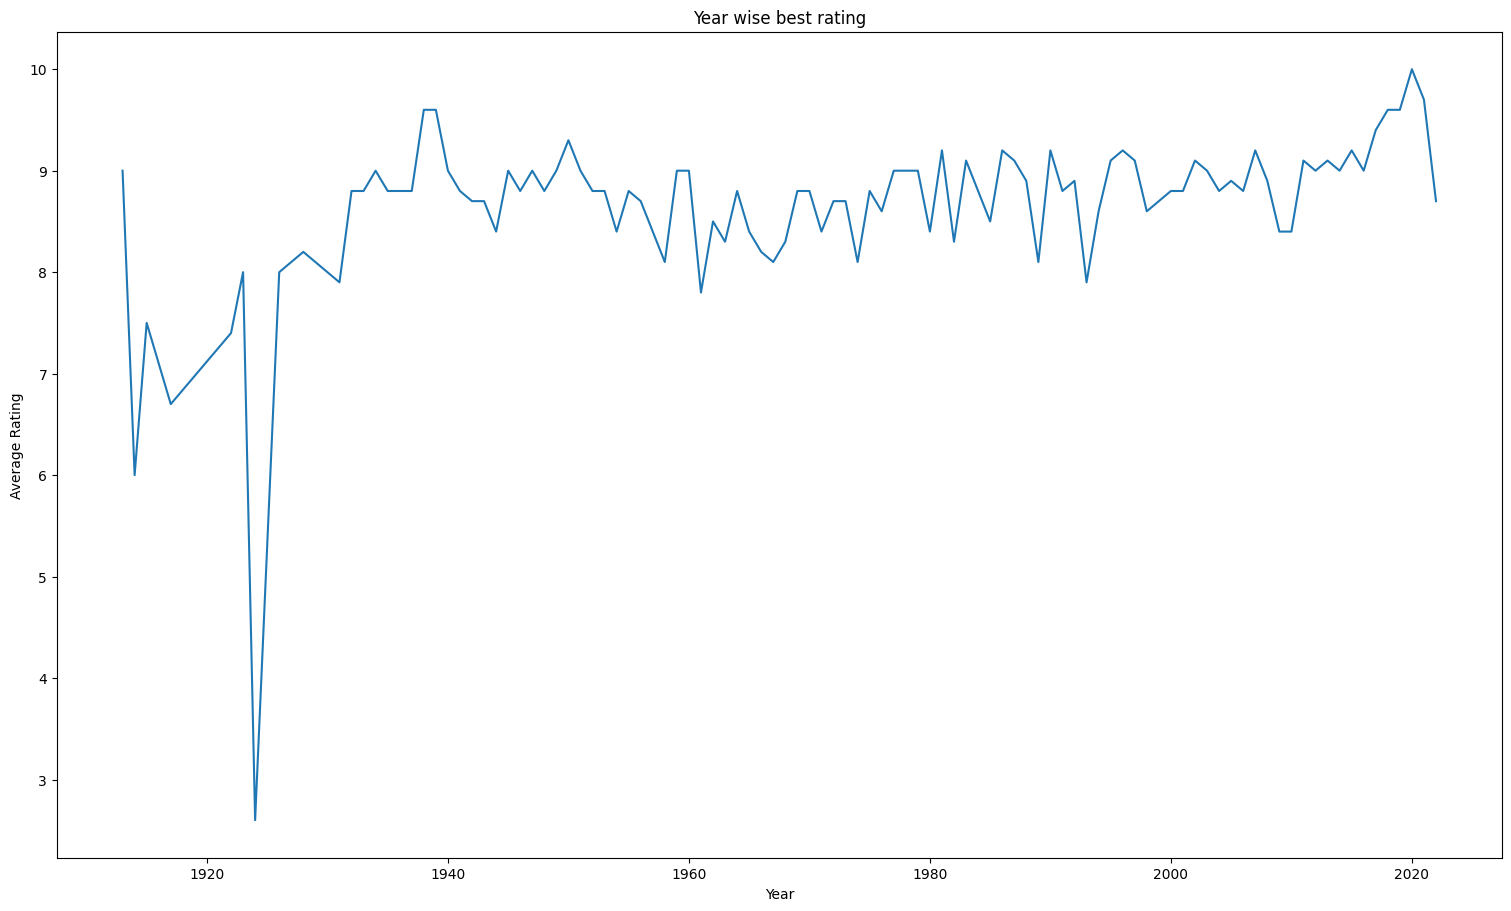

In [ ]:
# Year with best rating
y_rtng=movie.sort_values(by='Rating',ascending=False)
y_rtng['Rank']=y_rtng.groupby('Year',as_index=False).cumcount() + 1
y_rtng=y_rtng.loc[y_rtng['Rank']==1]


plt.figure(figsize=(15,9),layout='constrained')
plt.title("Year wise best rating")
plt.xlabel('Year')
plt.ylabel('Average Rating')
sns.lineplot(data=y_rtng,x='Year',y='Rating',ci=0)
plt.show()

- As the year passes by, the number of rating was also increased

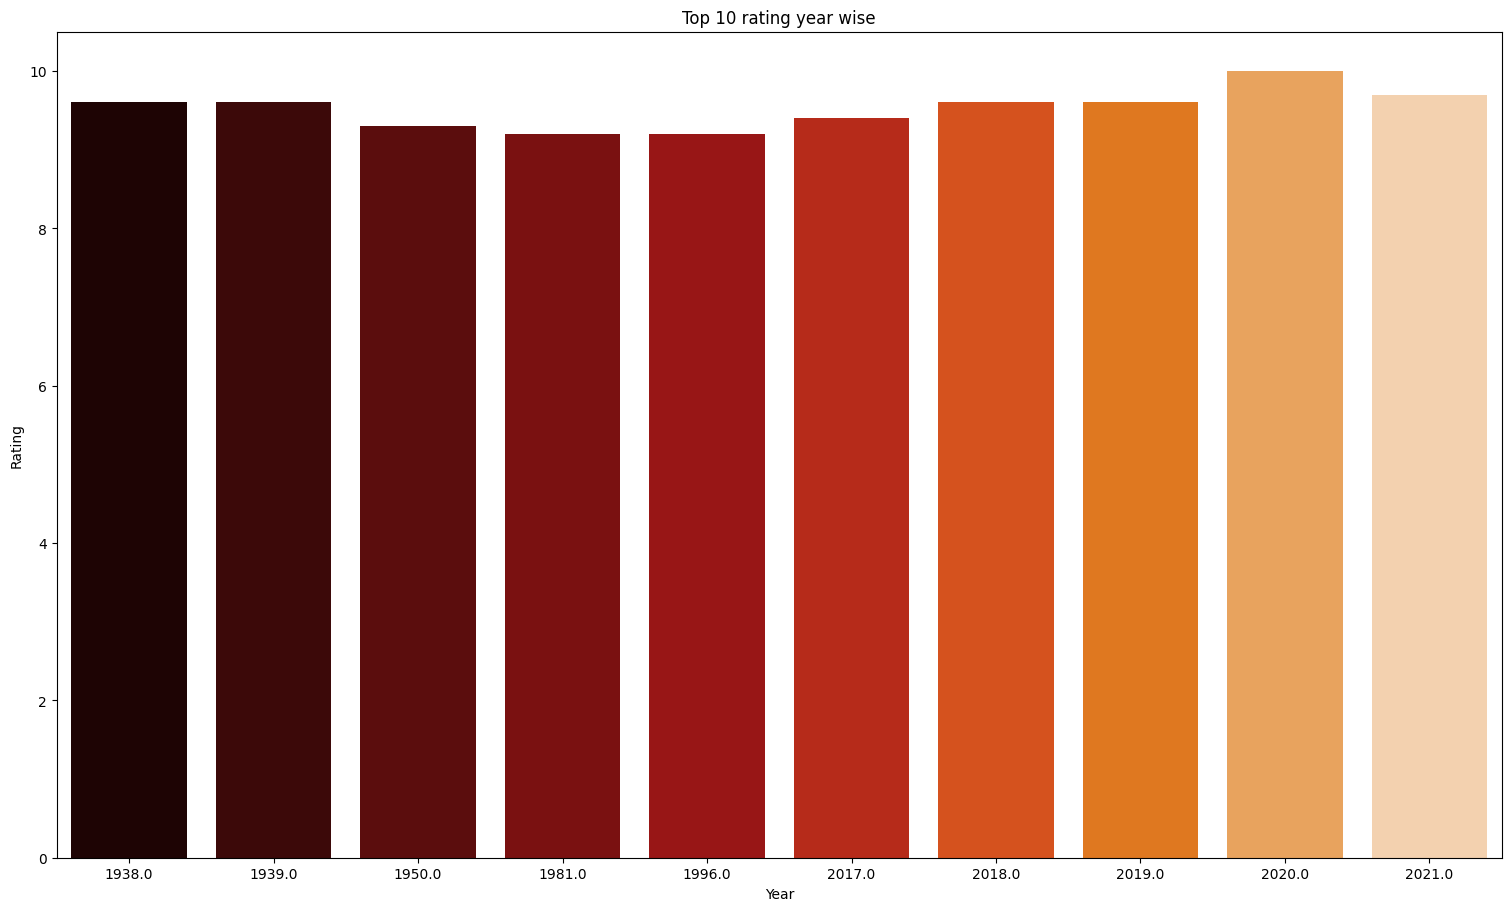

In [ ]:
# Top 10 rating year wise
y_rtng_s=y_rtng.sort_values(by='Rating',ascending=False).reset_index().drop('index',axis=1)
plt.figure(figsize=(15,9),layout='constrained')
plt.title("Top 10 rating year wise")
plt.xlabel('Year')
plt.ylabel('Average Rating')
sns.barplot(data=y_rtng_s[:10],x='Year',y='Rating',ci=0,palette='gist_heat')
plt.show()

- At the year 2020 it will achieve top rating among all the year's rating

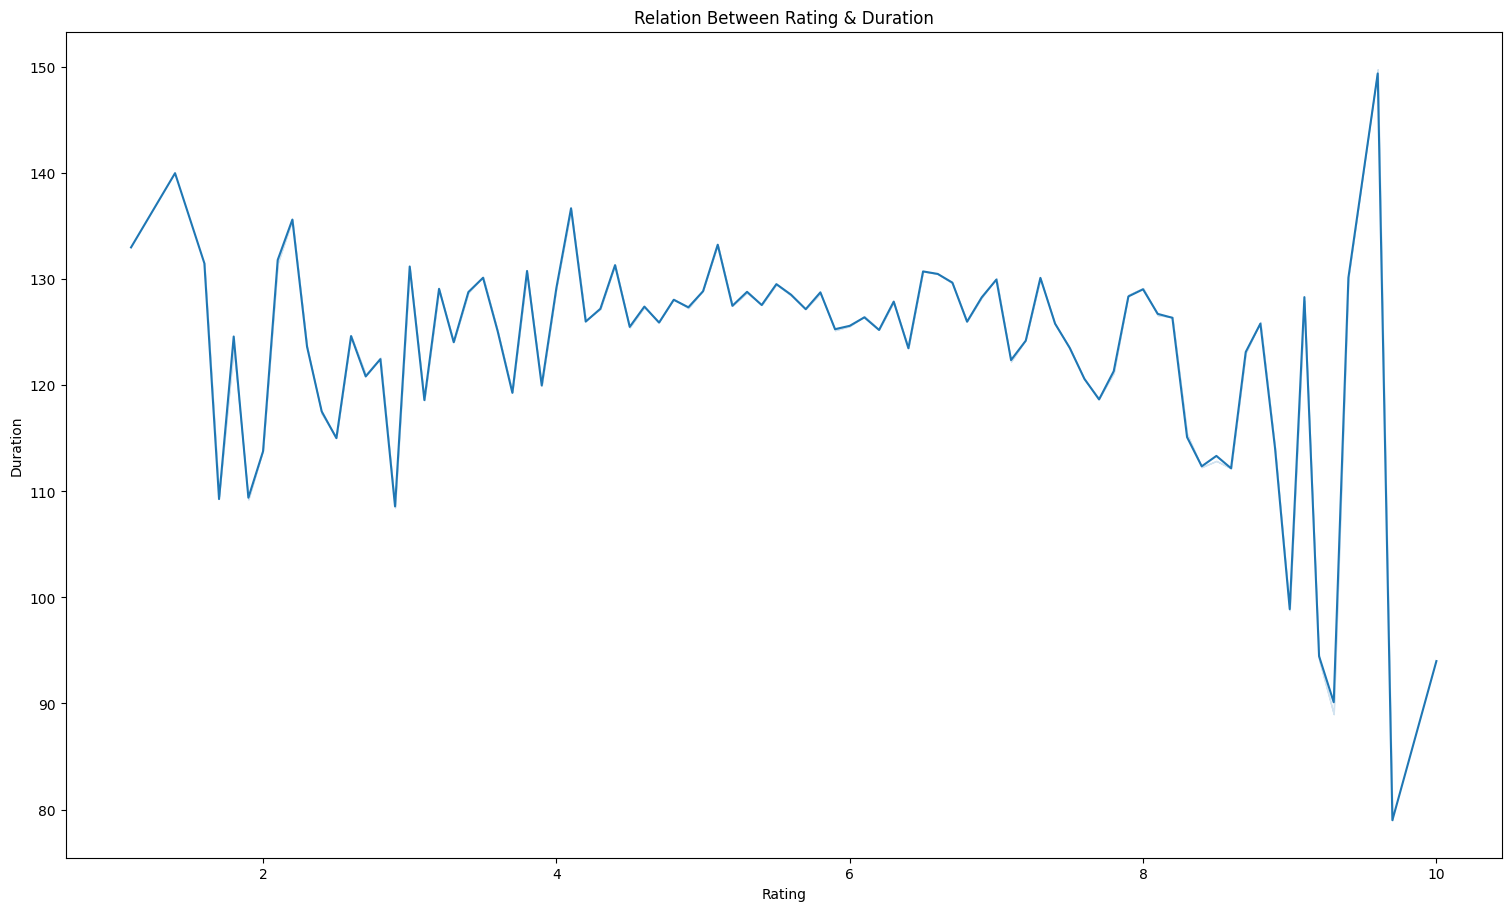

In [ ]:
# Relation between rating & duration of the movies
plt.figure(figsize=(15,9),layout='constrained')
sns.lineplot(data=movie,x='Rating',y='Duration(min)',ci=0)
plt.title("Relation Between Rating & Duration")
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.show()

- Here we can observe there is no as such observable pattern present in between rating & duration. Even low rated movies have average duration 120 mins.

In [ ]:
# Top10 movie according to rating per year
# Sort the DataFrame by Year and Rating
sorted_movie = movie.sort_values(by=['Year', 'Rating'], ascending=[True, False])

# Create a ranking for each year
sorted_movie['Rank'] = sorted_movie.groupby('Year',as_index=False).cumcount() + 1

# Filter for the top 10 movies per year
top_10_per_year = sorted_movie[sorted_movie['Rank'] <= 10]

top_10_per_year

,Name,Year,Duration(min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Rank
9473,Mohini Bhasmasur,1913.0,152.0,Drama,9.0,119.0,Dhundiraj Govind Phalke,Kamlabai Gokhale,Durgabai,Pran,1
12575,Satyavan Savitri,1914.0,144.0,Drama,6.0,90.0,Dhundiraj Govind Phalke,Ashok Kumar,Rekha,Pran,1
3532,Death of Narayanrao Peshwa,1915.0,100.0,Drama,7.5,18.0,Shree Nath Patankar,G. Ranade,D. Joshi,K.G. Gokhale,1
8146,Lanka Dahan,1917.0,110.0,"Adventure, Drama, Fantasy",6.7,22.0,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke,1
7337,Karna,1922.0,150.0,"Action, Drama, History",7.4,16.0,Shree Nath Patankar,Raja Sandow P.K.,Rekha,Pran,1
...,...,...,...,...,...,...,...,...,...,...,...
640,Adipurush,2022.0,158.0,"Action, Drama, History",7.2,8.0,Om Raut,Prabhas,Saif Ali Khan,Kriti Sanon,6
2699,Chaalbaaz in London,2022.0,92.0,Comedy,7.2,17.0,Pankaj Parashar,Shraddha Kapoor,Rekha,Pran,7
14472,Tsunami,2022.0,83.0,"Drama, Thriller",7.1,13.0,Madhu Sudhanan,Ashok Kumar,Rekha,Pran,8
5084,Ghubar,2022.0,107.0,"Crime, Mystery",7.0,8.0,Swaminathan Sridhar,Vijay Kumar,Vivek Pandey,Jitendra Rana,9


In [ ]:
# Top10 movie according to rating
sort_movie=movie.sort_values(by='Rating',ascending=False)
top_10_movie=sort_movie[:10]
top_10_movie[['Name','Rating','Votes','Year']]

,Name,Rating,Votes,Year
8339,Love Qubool Hai,10.0,5.0,2020.0
3580,Dekh Mujhe Bhi - Syed Fardeen and Shweta Jean,9.7,29.0,2021.0
5410,Half Songs,9.7,7.0,2021.0
2543,Boxer,9.6,126.0,2019.0
2563,Breed,9.6,48.0,2020.0
2556,Brandy Ki Botal,9.6,50.0,1939.0
2546,Boyfriend.com,9.6,8.0,2018.0
2552,Brahmachari,9.6,366.0,1938.0
5077,Gho Gho Rani,9.4,47.0,2019.0
11704,Ram-Path,9.4,5.0,2017.0


In [ ]:
# Number of Popular Movies Released each year
pop_movie=movie.sort_values(by=['Rating','Votes'],ascending=[False,False])
pop_movie['Rank']=pop_movie.groupby('Year').cumcount()+1
pop_movie_y=pop_movie.loc[pop_movie['Rank']<=3]
num_p_m_y=pop_movie_y.groupby('Year',as_index=False)['Name'].count()
num_p_m_y

,Year,Name
0,1913.0,1
1,1914.0,1
2,1915.0,1
3,1917.0,1
4,1922.0,1
...,...,...
97,2018.0,3
98,2019.0,3
99,2020.0,3
100,2021.0,3


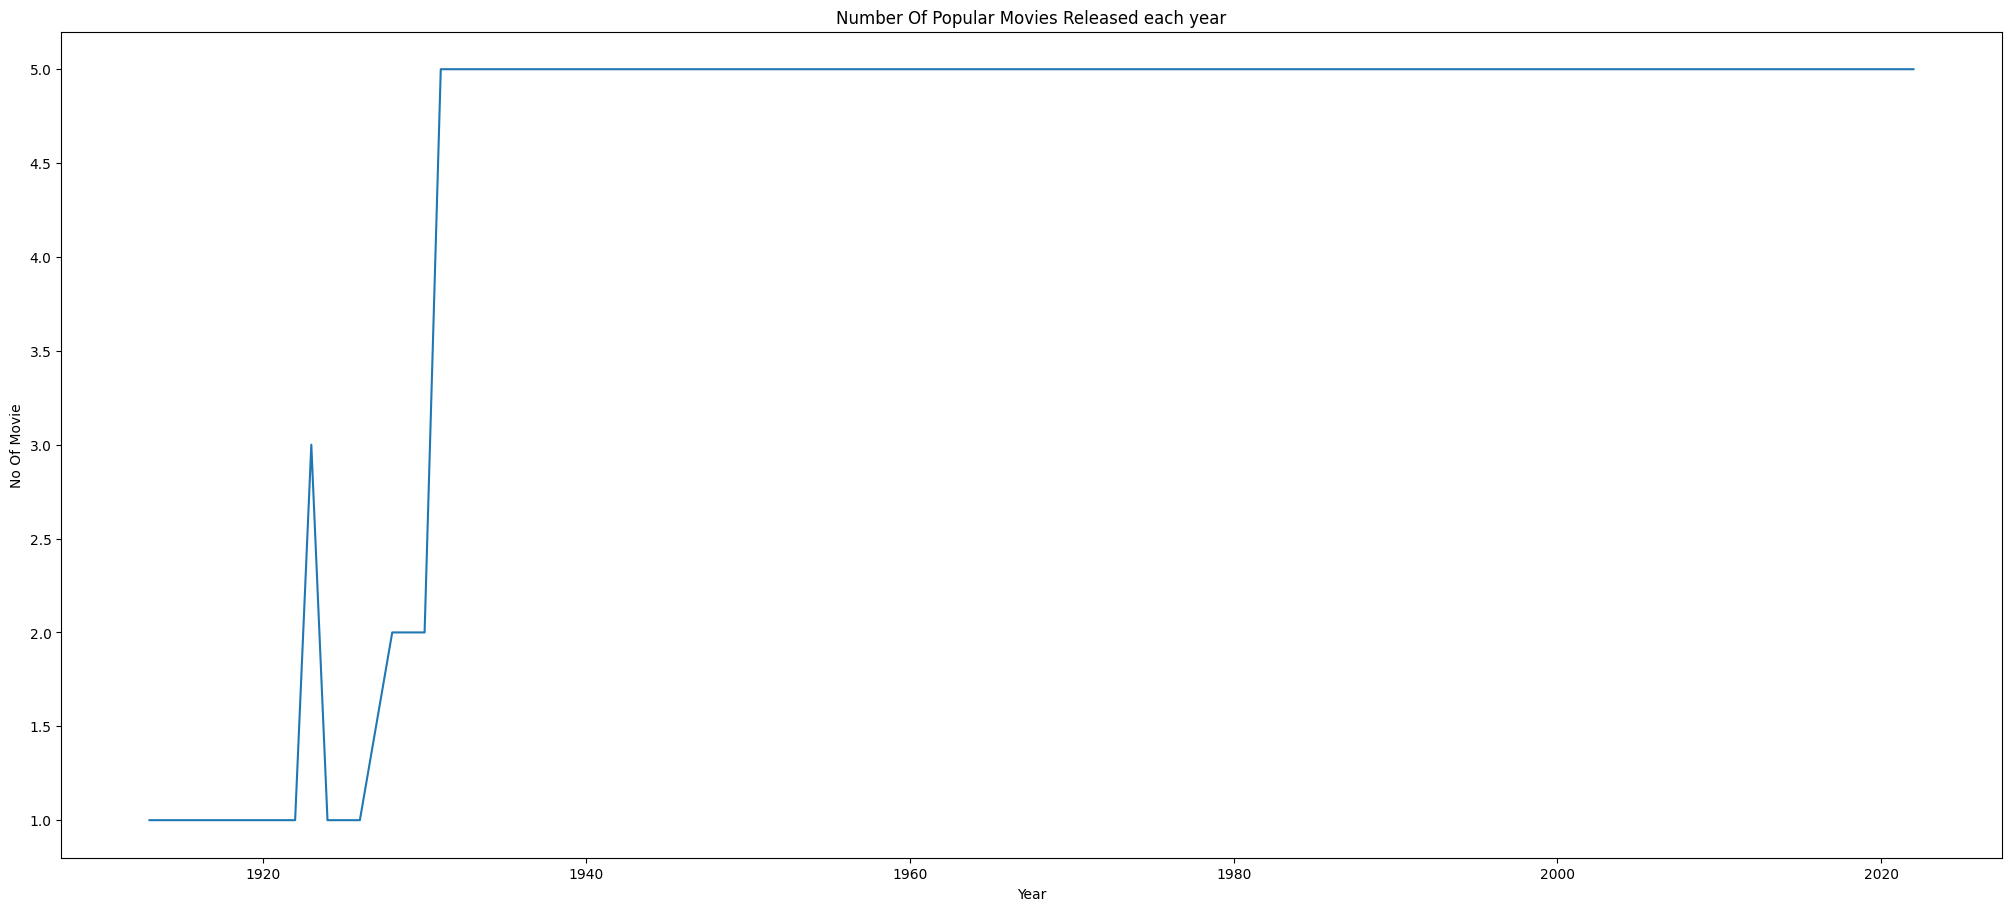

In [ ]:
# Number of Popular Movies Released each year
pop_movie=movie.sort_values(by=['Rating'],ascending=False)
pop_movie['Rank']=pop_movie.groupby('Year').cumcount()+1
pop_movie_y=pop_movie.loc[pop_movie['Rank']<=5]
num_p_m_y=pop_movie_y.groupby('Year',as_index=False)['Name'].count()

plt.figure(figsize=(20,9),layout='constrained')
plt.title("Number Of Popular Movies Released each year")
plt.xlabel("Year")
plt.ylabel("No Of Movie")
sns.lineplot(data=num_p_m_y,x='Year',y='Name',ci=0)
plt.show()

In [ ]:
# Number of votes which movies performed better in rating per year
pop_movie=movie.sort_values(by=['Rating','Votes','Year'],ascending=[False,False,True])
pop_movie['Rank']=pop_movie.groupby('Year').cumcount()+1
pop_movie_y=pop_movie.loc[pop_movie['Rank']<=5]
pop_movie_y

,Name,Year,Duration(min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Rank
8339,Love Qubool Hai,2020.0,94.0,"Drama, Romance",10.0,5.0,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari,1
3580,Dekh Mujhe Bhi - Syed Fardeen and Shweta Jean,2021.0,79.0,"Music, Romance",9.7,29.0,Saaz Khan,Shaim Khan,Saif Aly,Syed Fardeen,1
5410,Half Songs,2021.0,79.0,"Music, Romance",9.7,7.0,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani,2
2552,Brahmachari,1938.0,156.0,Drama,9.6,366.0,Master Vinayak,Master Vinayak,Meenaxi,V.G. Jog,1
2543,Boxer,2019.0,164.0,Drama,9.6,126.0,Vivek,Arun Vijay,Ritika Singh,Sanjjanaa Galrani,1
...,...,...,...,...,...,...,...,...,...,...,...
8146,Lanka Dahan,1917.0,110.0,"Adventure, Drama, Fantasy",6.7,22.0,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke,1
12575,Satyavan Savitri,1914.0,144.0,Drama,6.0,90.0,Dhundiraj Govind Phalke,Ashok Kumar,Rekha,Pran,1
2137,Bhakta Gora Kumbhar,1923.0,165.0,Drama,5.5,7.0,Dhundiraj Govind Phalke,Ashok Kumar,Rekha,Pran,3
14803,Veer Na Ver,1930.0,150.0,Drama,5.0,5.0,Moti B. Gidwani,Gohar,Master Vithal,Pran,2


**-------------------- Data Preprocessing --------------------**

- For Machine Learning Model building I'm considering genre, actors,directors features.

In [ ]:
# Taking Required Columns
movie=movie[['Year', 'Duration(min)', 'Genre', 'Rating','Director','Actor 1', 'Actor 2', 'Actor 3']]


# Lable Encoding
lst=['Director','Actor 1','Actor 2','Actor 3','Genre']

for i in lst:
  movie[i+"_encoder"]=LabelEncoder().fit_transform(movie[i])

# Taking the numerical columns
num=movie.select_dtypes(include=[np.number])

# Scaling
scl=pd.DataFrame(MinMaxScaler().fit_transform(num.to_numpy()),columns=num.columns)

# Scaled Data
scl.head()

,Year,Duration(min),Rating,Director_encoder,Actor 1_encoder,Actor 2_encoder,Actor 3_encoder,Genre_encoder
0,0.972477,0.335423,0.662921,0.324406,0.476998,0.163599,0.644947,0.617769
1,0.972477,0.335423,0.662921,0.260738,0.695357,0.979550,0.109359,0.617769
2,0.990826,0.275862,0.764045,0.862894,0.787153,0.586094,0.715916,0.725207
3,0.972477,0.338558,0.370787,0.559037,0.618402,0.307566,0.834198,0.471074
4,0.889908,0.322884,0.573034,0.064848,0.659741,0.707975,0.084042,0.617769


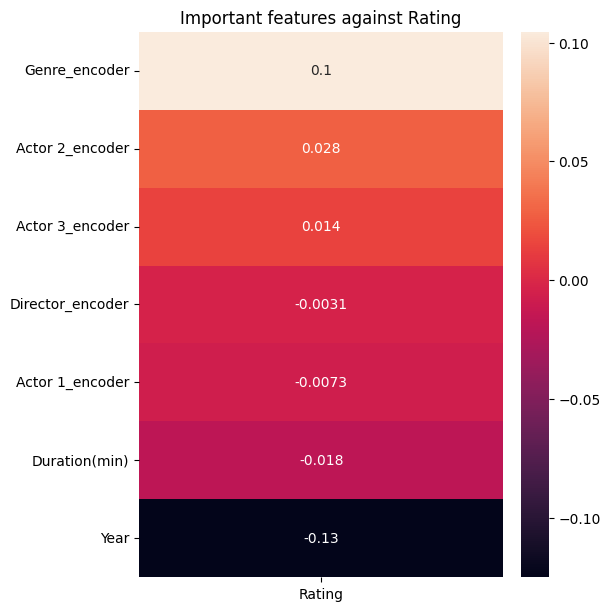

In [ ]:
# Important features against Rating
cor=scl.corr()
target=cor['Rating'].drop('Rating')
target_s=target.sort_values(ascending=False)
plt.figure(figsize=(6,6),layout='constrained')
plt.title("Important features against Rating")
sns.heatmap(target_s.to_frame(),annot=True)
plt.show()

In [ ]:
# Selecting Feature & Target Variable
x=scl.drop('Rating',axis=1)
y=scl['Rating']

# Data Spliting for training & testing
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

**-------------------- ML Model Building --------------------**

In [ ]:
# Linear Regression
def model_lr(x_train,x_test,y_train,y_test):
  global r2_trn_lr,r2_lr,rmse_lr
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)

  # Evaluation Metric
  r2_trn_lr=lr.score(x_train,y_train)
  r2_lr=r2_score(y_test,y_pred)
  rmse_lr=mean_squared_error(y_test,y_pred,squared=False)

  print("----------Linear Regression-----------")
  print("\n")
  print("Training R2: ",r2_trn_lr)
  print("Testing R2: ",r2_lr)
  print("RMSE: ",rmse_lr)
  print("\n")
  print(10*"==========")

# Support Vector Regressor
def model_sv(x_train,x_test,y_train,y_test):
  global r2_trn_sv,r2_sv,rmse_sv
  sv=SVR()
  sv.fit(x_train,y_train)
  y_pred=sv.predict(x_test)

  # Evaluation Metric
  r2_trn_sv=sv.score(x_train,y_train)
  r2_sv=r2_score(y_test,y_pred)
  rmse_sv=mean_squared_error(y_test,y_pred,squared=False)

  print("----------Support Vector Regressor-----------")
  print("\n")
  print("Training R2: ",r2_trn_sv)
  print("Testing R2: ",r2_sv)
  print("RMSE: ",rmse_sv)
  print("\n")
  print(10*"==========")

# Random Forest
def model_rf(x_train,x_test,y_train,y_test):
  global r2_trn_rf,r2_rf,rmse_rf
  rf=RandomForestRegressor(random_state=10)
  rf.fit(x_train,y_train)
  y_pred=rf.predict(x_test)

  # Evaluation Metric
  r2_trn_rf=rf.score(x_train,y_train)
  r2_rf=r2_score(y_test,y_pred)
  rmse_rf=mean_squared_error(y_test,y_pred,squared=False)

  print("----------Random Forest Regressor-----------")
  print("\n")
  print("Training R2: ",r2_trn_rf)
  print("Testing R2: ",r2_rf)
  print("RMSE: ",rmse_rf)
  print("\n")
  print(10*"==========")

# XG Boost Regressor
def model_xg(x_train,x_test,y_train,y_test):
  global r2_trn_xg,r2_xg,rmse_xg
  xg=XGBRegressor(random_state=10)
  xg.fit(x_train,y_train)
  y_pred=xg.predict(x_test)

  # Evaluation Metric
  r2_trn_xg=xg.score(x_train,y_train)
  r2_xg=r2_score(y_test,y_pred)
  rmse_xg=mean_squared_error(y_test,y_pred,squared=False)

  print("----------XG Boost Regressor-----------")
  print("\n")
  print("Training R2: ",r2_trn_xg)
  print("Testing R2: ",r2_xg)
  print("RMSE: ",rmse_xg)
  print("\n")
  print(10*"==========")

**-------------------- ML Model Evaluation --------------------**

In [ ]:
model_lr(x_train,x_test,y_train,y_test)
model_sv(x_train,x_test,y_train,y_test)
model_rf(x_train,x_test,y_train,y_test)
model_xg(x_train,x_test,y_train,y_test)

----------Linear Regression-----------


Training R2:  0.0261452623942533
Testing R2:  0.02580695606441563
RMSE:  0.15544159409129046


----------Support Vector Regressor-----------


Training R2:  0.19155859929181285
Testing R2:  0.10457805944154852
RMSE:  0.14902481629697534


----------Random Forest Regressor-----------


Training R2:  0.8833919830746513
Testing R2:  0.18340587542817388
RMSE:  0.14231407511552788


----------XG Boost Regressor-----------


Training R2:  0.649527845903477
Testing R2:  0.15302846262226866
RMSE:  0.14493695646230678




In [ ]:
# MOdel Evaluation Tabular Format
tbl=pd.DataFrame()
tbl['Model']=['Linear Regression','SV Regressor','Random Forest','X Gradient Boosting']
tbl['Training R2']=[r2_trn_lr,r2_trn_sv,r2_trn_rf,r2_trn_xg]
tbl['Testing R2']=[r2_lr,r2_sv,r2_rf,r2_xg]
tbl['RMSE']=[rmse_lr,rmse_sv,rmse_rf,rmse_xg]

tbl.sort_values('RMSE',ascending=True,ignore_index=True)

,Model,Training R2,Testing R2,RMSE
0,Random Forest,0.883392,0.183406,0.142314
1,X Gradient Boosting,0.649528,0.153028,0.144937
2,SV Regressor,0.191559,0.104578,0.149025
3,Linear Regression,0.026145,0.025807,0.155442


- From above result we can observe that there is no as such ML model that gives the best result.
- So i'm going for Deep Learning Models

**-------------------- DL Model Building --------------------**

In [ ]:
# Model Building
model=Sequential()
model.add(Dense(256,input_dim=7,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Model Summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               2048      
                                                                 
 dropout_33 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dropout_35 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 1)               

In [ ]:
# Iteration
history = model.fit(x_train , y_train , epochs = 100, validation_split= 0.2)

Epoch 1/100
272/272 [==============================] - 3s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.1553 - val_loss: 0.0237 - val_mean_absolute_error: 0.1242
Epoch 2/100
272/272 [==============================] - 1s 4ms/step - loss: 0.0278 - mean_absolute_error: 0.1335 - val_loss: 0.0246 - val_mean_absolute_error: 0.1284
Epoch 3/100
272/272 [==============================] - 1s 4ms/step - loss: 0.0260 - mean_absolute_error: 0.1289 - val_loss: 0.0223 - val_mean_absolute_error: 0.1191
Epoch 4/100
272/272 [==============================] - 1s 4ms/step - loss: 0.0250 - mean_absolute_error: 0.1266 - val_loss: 0.0222 - val_mean_absolute_error: 0.1188
Epoch 5/100
272/272 [==============================] - 1s 4ms/step - loss: 0.0250 - mean_absolute_error: 0.1268 - val_loss: 0.0222 - val_mean_absolute_error: 0.1199
Epoch 6/100
272/272 [==============================] - 1s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.1244 - val_loss: 0.0219 - val_mean_absolute_error: 0.1162
Epoch 7/10

In [ ]:
# Prediction
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)

print("--------Deep Learning Model Evaluation----------")
print("\n")
print("R2 Score: ",r2)

146/146 [==============================] - 0s 2ms/step
--------Deep Learning Model Evaluation----------


R2 Score:  0.13174998966129536
